In [26]:
import sys
import os
import unittest
from unittest.mock import patch, MagicMock
import xarray as xr
import numpy as np
import datetime
import time

In [2]:
# from regional_extremes import CLIMATIC_FILEPATH
CLIMATIC_FILEPATH = "/Net/Groups/BGI/scratch/mweynants/DeepExtremes/v3/PEICube.zarr"
from regional_extremes import RegionalExtremes, ClimaticRegionalExtremes

In [3]:
def mock_climatic_dataset(index, longitude=None, latitude=None, time=None):
        if longitude is None:
            longitude = np.arange(0, 360, 50.5)
        if latitude is None:
            latitude = np.arange(-90, 90, 50.5)
        if time is None:
            time = np.array(
                [
                    datetime.date(1950, 1, 1),
                    datetime.date(1951, 1, 1),
                    datetime.date(1979, 1, 1),
                    datetime.date(2022, 1, 1),
                ]
            ).astype("datetime64[ns]")

        climatic_data = np.random.uniform(
            -10, 130, (len(longitude), len(latitude), len(time))
        )

        return xr.Dataset(
            {index: (["longitude", "latitude", "time"], climatic_data)},
            coords={"longitude": longitude, "latitude": latitude, "time": time},
        )


In [15]:
processor = ClimaticRegionalExtremes(index="pei_180", step_msc=5)
# Use the mock dataset
dates = [
    datetime.date(2017, 1, 1) + datetime.timedelta(days=x)
    for x in range(0, 366, 1)
]
dates = np.array(dates).astype("datetime64[ns]")
# processor.data = mock_climatic_dataset(index="pei_180", time=dates)
processor.load_data()
# Apply the transformations
processor.apply_transformations()
pca_components = processor.compute_pca_and_transform(n_samples=100)
pca_bins = processor.define_box(pca_components, n_bins=4)
#boxes = processor.find_boxes(pca_components, pca_bins)

X_new = processor.apply_pca(n_samples=20)
box_indices = processor.find_boxes(X_new, pca_bins)



Climatic datas loaded with dimensions: FrozenMappingWarningOnValuesAccess({'time': 2191, 'lonlat': 1038240})
PCA performed. sum explained variance: 0.9997084829284913


In [46]:
pca_components = processor.compute_pca_and_transform(n_samples=100)
pca_bins = processor.define_box(pca_components, n_bins=4)

PCA performed. sum explained variance: 0.9978977610292459


In [47]:
#pca_components = processor.apply_pca(n_samples=100)
box_indices = processor.find_boxes(X_new, pca_bins) + 1


Minimum color value: 0.0
Maximum color value: 0.8


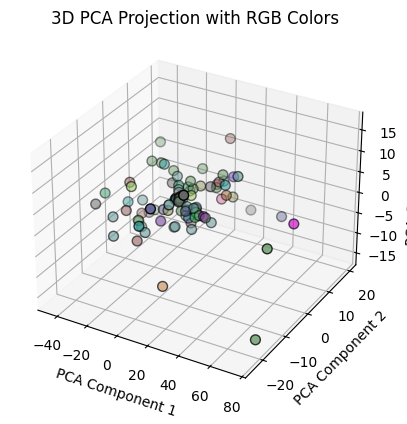

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
n_bins=4
#find_boxes(pca_components, pca_bins)
# Convert box indices to RGB colors
# Normalize indices to the range [0, 1] for RGB
norm_box_indices = box_indices / (n_bins + 1)
colors = norm_box_indices


# Check that the colors are within the 0-1 range
print("Minimum color value:", colors.min())
print("Maximum color value:", colors.max())

# Ensure all values are within the [0, 1] range
assert colors.min() >= 0 and colors.max() <= 1, "RGBA values should be within the 0-1 range"


# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2], c=colors, s=50, edgecolor='k')

# Adding labels and title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D PCA Projection with RGB Colors')

plt.show()

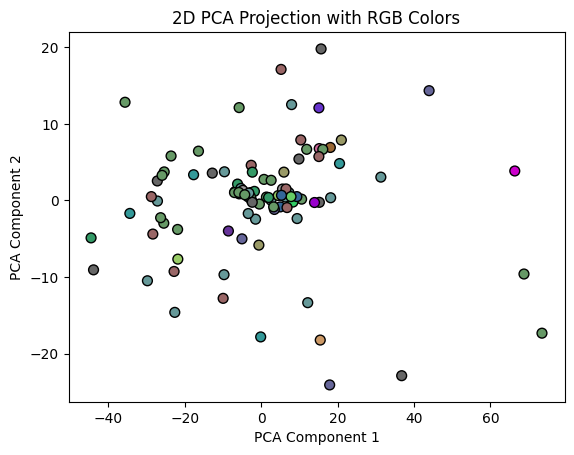

In [51]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111)
# Scatter plot
sc = ax.scatter(pca_components[:, 0], pca_components[:, 1], c=colors, s=50, edgecolor='k')

# Adding labels and title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_title('2D PCA Projection with RGB Colors')

plt.show()

(100, 3, 4)


/tmp/ipykernel_1032693/4140393472.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('viridis')


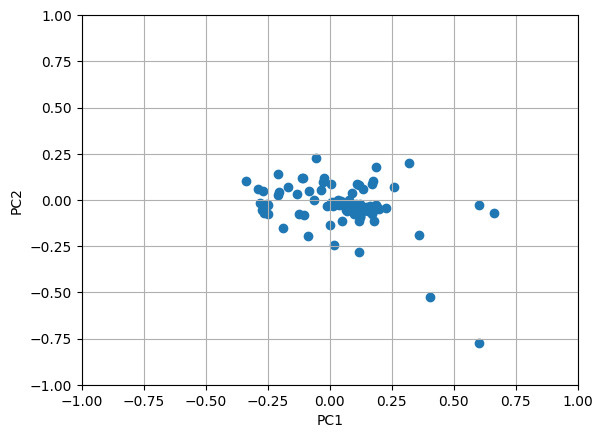

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def myplot(score):
    xs = score[:,0]
    ys = score[:,1]
    #n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    # Normalize box indices for colormap
    norm_boxes = (boxes - np.min(boxes)) / (np.max(boxes) - np.min(boxes))
    # Create an RGB color map
    colormap = cm.get_cmap('viridis')
    colors = colormap(norm_boxes)
    print(colors.shape)
    plt.scatter(xs * scalex,ys * scaley)

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(X_new[:,0:2])
plt.show()


/tmp/ipykernel_1032693/3866085629.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('viridis')


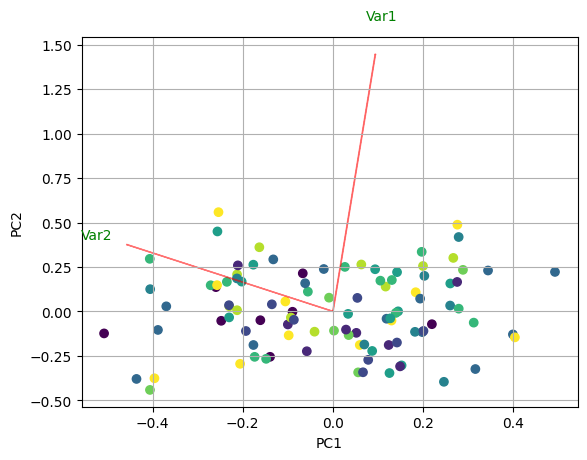

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define your PCA score, coeff, and boxes
score = np.random.randn(100, 2)  # Replace with your PCA scores
coeff = np.random.randn(2, 2)    # Replace with your PCA coefficients
boxes = np.random.randint(0, 10, 100)  # Replace with your box indices

# Define the plotting function
def myplot(score, coeff, boxes, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    
    # Normalize box indices for colormap
    norm_boxes = (boxes - np.min(boxes)) / (np.max(boxes) - np.min(boxes))
    
    # Create an RGB color map
    colormap = cm.get_cmap('viridis')
    colors = colormap(norm_boxes)
    
    plt.scatter(xs * scalex, ys * scaley, color=colors)
    
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.show()

# Plot the data
myplot(score, coeff, boxes)
